In [1]:

import uproot
import matplotlib.pyplot as plt
import numpy as np
from MOPSO import get_metrics
import csv

In [73]:
num_agents = 200
num_iterations = 3
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.2]
params_ub = [0.006, 0.03, 0.2, 0.8]

In [84]:
default_params = [0.0020000000949949026, 0.003000000026077032, 0.15000000596046448, 0.25]
default_metrics = get_metrics(uproot.open('default.root'), 0)

In [76]:
# effs = []
# fakes = []

metrics = []
max_eff = 0
min_eff = 1
max_fake = 0
min_fake = 1
for i in range(num_iterations):
    file = uproot.open('history/validation/iteration' + str(i) + '.root')
    temp = []
    for j in range(num_agents):
        fitness = get_metrics(file, j)
        if 1 / fitness[0] > max_eff:
            max_eff = 1 / fitness[0]
        if 1 / fitness[0] < min_eff:
            min_eff = 1 / fitness[0]
        if fitness[1] > max_fake:
            max_fake = fitness[1]
        if fitness[1] < min_fake:
            min_fake = fitness[1]
        temp.append(fitness)
    metrics.append(np.transpose(temp))
    
    file.close()


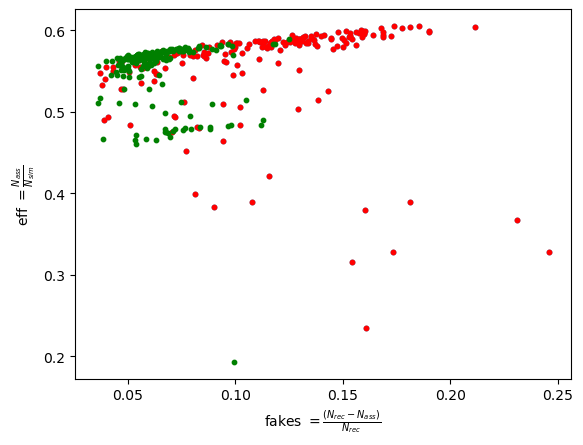

In [81]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(min_fake - 0.1, max_fake + 0.1)
    # ax.set_ylim(min_eff - 0.1, max_eff + 0.1)
    s = ax.scatter(metrics[0][1], 1 / metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 / metrics[i][0], c="red", s=10)
    s = ax.scatter(metrics[num_iterations - 1][1], 1 / metrics[num_iterations - 1][0], c="green", s=10)
    ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('gifs/metrics.gif', writer='pillow')


In [66]:
params = []
for i in range(num_iterations):
    temp = []
    with open("history/parameters/iteration" + str(i) + ".csv", "r") as f:
        reader = csv.reader(f)
        for row in reader:
            temp.append(np.asarray(row, dtype="float32"))
    params.append(np.transpose(temp))

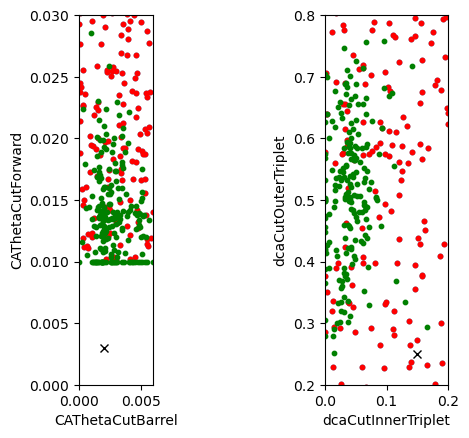

In [86]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(121, aspect='equal')
    ax.set_xlim(params_lb[0], params_ub[0])
    ax.set_ylim(params_lb[1], params_ub[1])
    s = ax.scatter(params[0][0], params[0][1], s=10)
    s = ax.scatter(params[i][0], params[i][1], c="red", s=10)
    s = ax.scatter(params[num_iterations - 1][0], params[num_iterations - 1][1], c="green", s=10)
    s = ax.plot(default_params[0], default_params[1], c="black", marker="x")
    ax.set_xlabel(params_names[0])
    ax.set_ylabel(params_names[1])
    ax = fig.add_subplot(122, aspect='equal')
    ax.set_xlim(params_lb[2], params_ub[2])
    ax.set_ylim(params_lb[3], params_ub[3])
    s = ax.scatter(params[0][2], params[0][3], s=10)
    s = ax.scatter(params[i][2], params[i][3], c="red", s=10)
    s = ax.scatter(params[num_iterations - 1][2], params[num_iterations - 1][3], c="green", s=10)
    s = ax.plot(default_params[2], default_params[3], c="black", marker="x")
    ax.set_xlabel(params_names[2])
    ax.set_ylabel(params_names[3])

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('gifs/params.gif', writer='pillow')